CHANGER LES DONNéES, IDENTIFIER LES DONNéES MANQUANTES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Age: 177 valeurs manquantes

Cabin: 687 valeurs manquantes

Embarked: 2 valeurs manquantes

In [4]:
#import seaborn as sns
import matplotlib.pyplot as plt

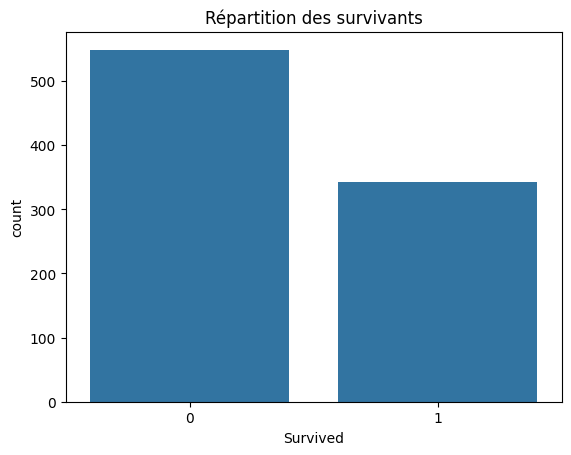

In [6]:
sns.countplot(x='Survived', data=train)
plt.title('Répartition des survivants')
plt.show()

In [ ]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


SURVIE SELON LES CLASSES DU BILLET

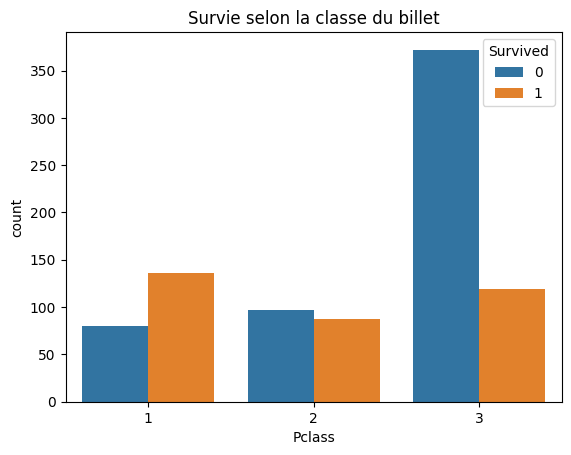

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title("Survie selon la classe du billet")
plt.show()

DISTRIBUTION SELON L'AGE

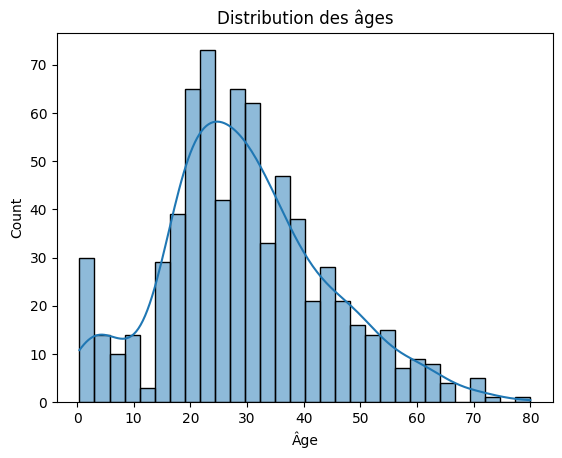

In [13]:
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title("Distribution des âges")
plt.xlabel("Âge")
plt.show()

SURVIE PAR CLASSE ET PAR SEXE

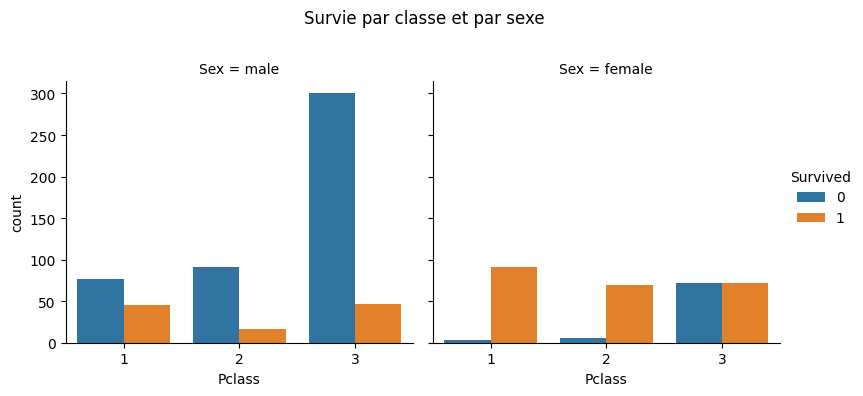

In [14]:
sns.catplot(x="Pclass", hue="Survived", col="Sex",
            data=train, kind="count", height=4, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survie par classe et par sexe")
plt.show()

SURVIE SELON PORT D'EMBARQUEMENT / CLASSE DE BILLET

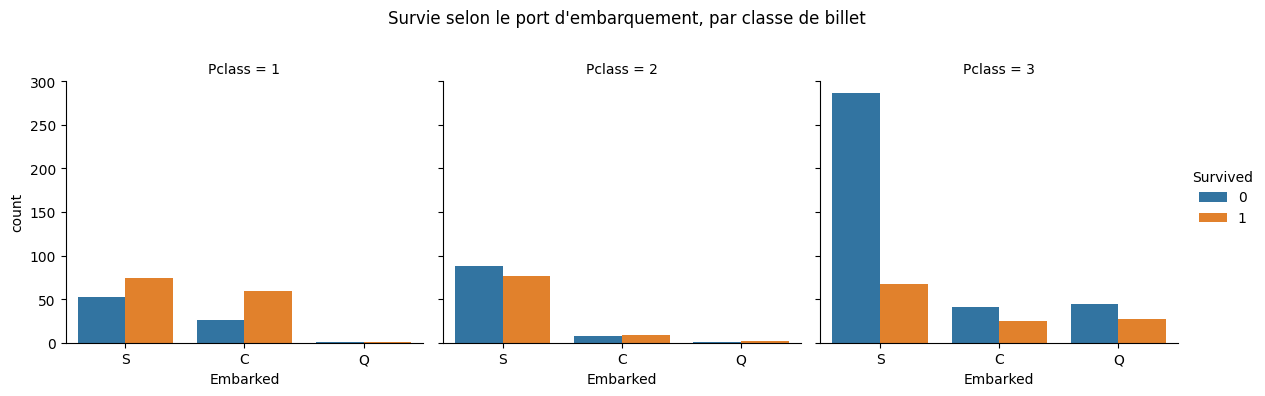

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Embarked", hue="Survived", col="Pclass",
            data=train, kind="count", height=4, aspect=1)

plt.subplots_adjust(top=0.8)
plt.suptitle("Survie selon le port d'embarquement, par classe de billet")
plt.show()


SURVIE SELON PORT D'EMBARQUEMENT / CLASSE DE BILLET / SEXE ?

Survie selon le nombre de parents/enfants à bord (par sexe)

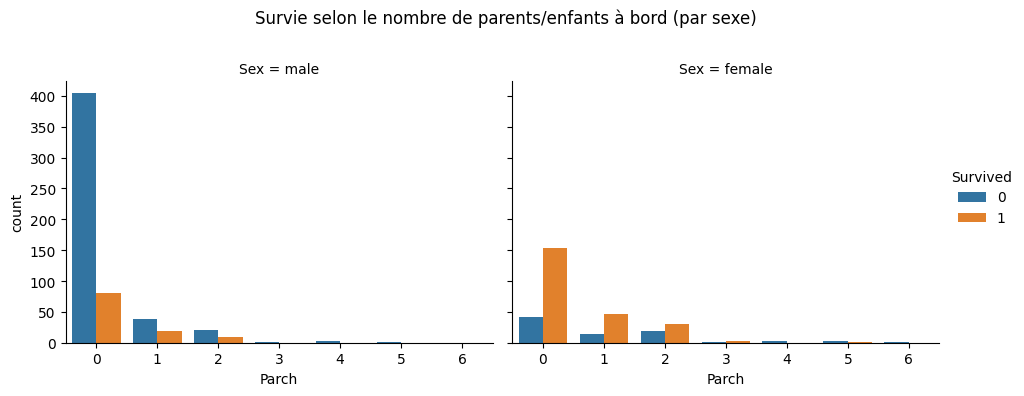

In [19]:
sns.catplot(x="Parch", hue="Survived", col="Sex",
            data=train, kind="count", height=4, aspect=1.2)

plt.subplots_adjust(top=0.8)
plt.suptitle("Survie selon le nombre de parents/enfants à bord (par sexe)")
plt.show()


Survie selon le nombre de frères/sœurs/conjoints à bord (par sexe)

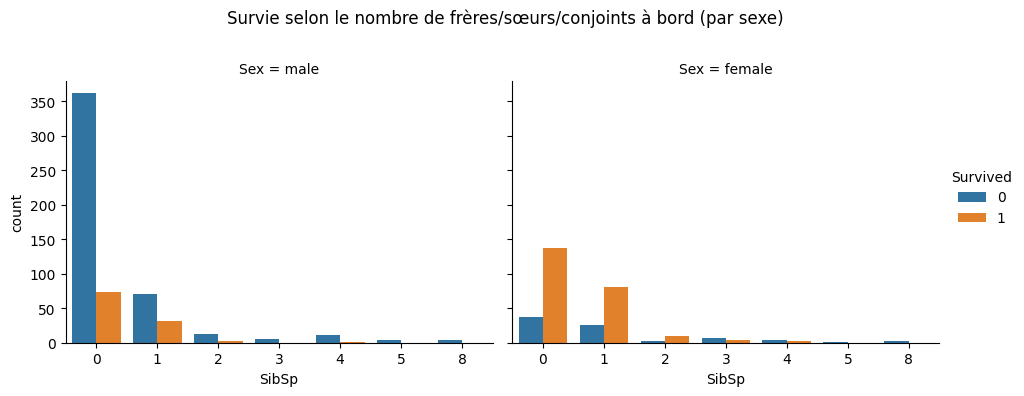

In [20]:
sns.catplot(x="SibSp", hue="Survived", col="Sex",
            data=train, kind="count", height=4, aspect=1.2)

plt.subplots_adjust(top=0.8)
plt.suptitle("Survie selon le nombre de frères/sœurs/conjoints à bord (par sexe)")
plt.show()



Répartition des sexes selon la classe de billet

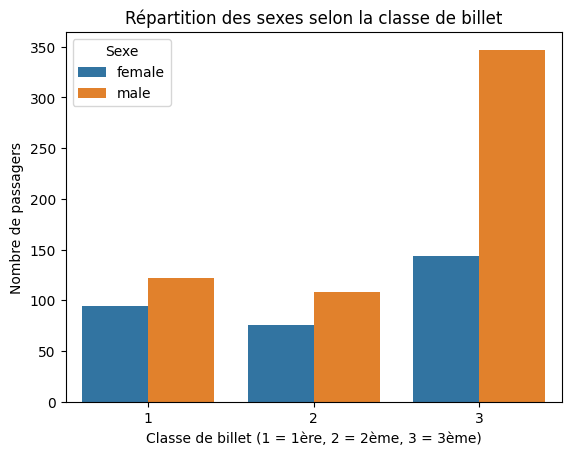

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Pclass", hue="Sex", data=train)
plt.title("Répartition des sexes selon la classe de billet")
plt.xlabel("Classe de billet (1 = 1ère, 2 = 2ème, 3 = 3ème)")
plt.ylabel("Nombre de passagers")
plt.legend(title="Sexe")
plt.show()



Survie selon les catégories de prix de billet

In [23]:
# On crée une nouvelle colonne qui classe les tarifs en 3 catégories
train["Fare_category"] = pd.qcut(train["Fare"], q=3, labels=["Bas", "Moyen", "Élevé"])


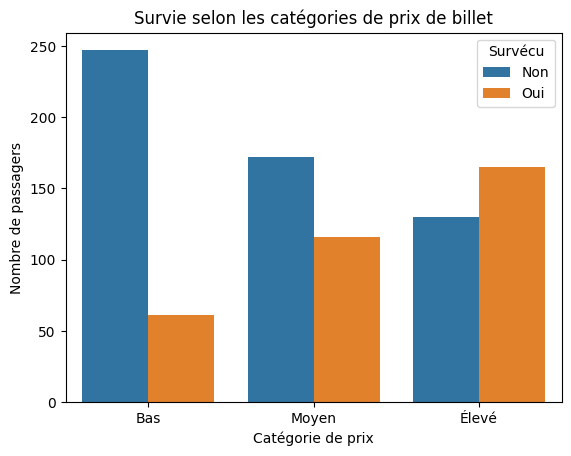

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Fare_category", hue="Survived", data=train)
plt.title("Survie selon les catégories de prix de billet")
plt.xlabel("Catégorie de prix")
plt.ylabel("Nombre de passagers")
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()


% of women who survived

In [25]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
% of men who survived

In [26]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Afficher les colonnes avec valeurs manquantes
Remplacer la valeur 'Age' par la mediane
Remplacer les valeurs catégorielles (ex : Embarked) par la valeur la plus fréquente (mode)
Remplacer les NaN d’une colonne par une valeur fixe (Cabin)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.isnull().sum())

train['Age'] = train['Age'].fillna(train['Age'].median())

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

train['Cabin'] = train['Cabin'].fillna('Inconnu')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Vérifier les types de données

In [16]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Remplacer les types de données manquantes pour: 
-Name 
-Sexe
-Ticket
-Cabin

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['Name'] = train['Name'].astype(str)
train['Sex'] = train['Sex'].astype(str)
train['Ticket'] = train['Ticket'].astype(str)
train['Cabin'] = train['Ticket'].astype(str)


Créer les données 'clean'

In [5]:
train.to_csv('train_clean.csv', index=False)


Trouver des hypohèses

Encodage

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_clean = pd.read_csv('train_clean.csv')

train_clean["Sex"] = train_clean["Sex"].map({"male": 0, "female": 1})
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train_clean['Embarked'] = train_clean['Embarked'].map(embarked_mapping)
train_clean = pd.get_dummies(train_clean, columns=['Embarked'], prefix='Embarked')
